# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url.format(lat=lats[i], lon=lngs[i], api_key=weather_api_key)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s | %s" % (record_count, set_count, city, city_url))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
    try:
        # Parse the JSON and retrieve data
        response_json = response.json()
        city_weather = response_json["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json["coord"]["lat"]
        city_lng = response_json["coord"]["lon"]
        city_max_temp = response_json["main"]["temp_max"]
        city_humidity = response_json["main"]["humidity"]
        city_clouds = response_json["clouds"]["all"]
        city_wind = response_json["wind"]["speed"]
        city_country = response_json["sys"]["country"]
        city_date = response_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river | https://api.openweathermap.org/data/2.5/weather?lat=-45.65134489244713&lon=95.20743701259025&appid=1a612cc88541ab51e114f09e678389f7&units=metric
City not found. Skipping...
Processing Record 2 of Set 1 | yellowknife | https://api.openweathermap.org/data/2.5/weather?lat=82.82249687306353&lon=-124.12420080176351&appid=1a612cc88541ab51e114f09e678389f7&units=metric
City not found. Skipping...
Processing Record 3 of Set 1 | adamstown | https://api.openweathermap.org/data/2.5/weather?lat=-42.685737785334446&lon=-134.24415261455357&appid=1a612cc88541ab51e114f09e678389f7&units=metric
City not found. Skipping...
Processing Record 4 of Set 1 | bilibino | https://api.openweathermap.org/data/2.5/weather?lat=82.71450534265347&lon=160.2671262200848&appid=1a612cc88541ab51e114f09e678389f7&units=metric
City not found. Skipping...
Processing Record 5 of Set 1 | thompson | https://api.openweatherma

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          156
Lat           156
Lng           156
Max Temp      156
Humidity      156
Cloudiness    156
Wind Speed    156
Country       156
Date          156
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yanam,16.0208,83.0973,28.79,78,98,13.62,IN,1721864694
1,susuman,66.6658,150.9612,11.00,62,100,1.46,RU,1721864694
2,kiffa,16.1557,-10.6323,28.12,66,78,3.16,MR,1721864695
3,manacapuru,-2.3872,-61.0332,28.38,56,89,1.24,BR,1721864695
4,jose bonifacio,-21.1991,-49.8543,22.37,26,32,3.74,BR,1721864696


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yanam,16.0208,83.0973,28.79,78,98,13.62,IN,1721864694
1,susuman,66.6658,150.9612,11.00,62,100,1.46,RU,1721864694
2,kiffa,16.1557,-10.6323,28.12,66,78,3.16,MR,1721864695
3,manacapuru,-2.3872,-61.0332,28.38,56,89,1.24,BR,1721864695
4,jose bonifacio,-21.1991,-49.8543,22.37,26,32,3.74,BR,1721864696


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

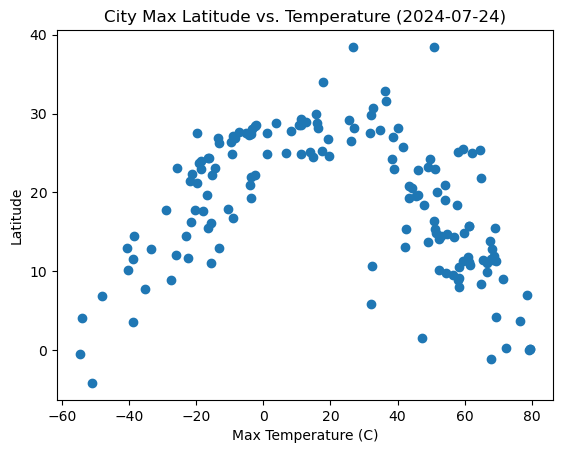

In [30]:
import datetime

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
unix_timestamp = city_data_df["Date"][0]
readable_date = datetime.datetime.fromtimestamp(unix_timestamp)
formatted_date = readable_date.strftime('%Y-%m-%d')
plt.title(f"City Max Latitude vs. Temperature ({formatted_date})")
plt.xlabel('Max Temperature (C)')
plt.ylabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

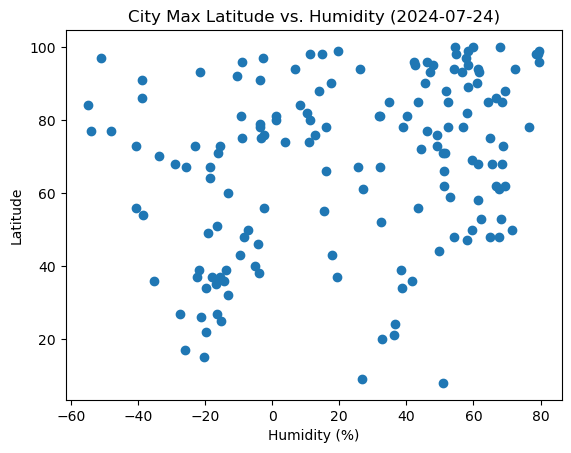

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity ({formatted_date})")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

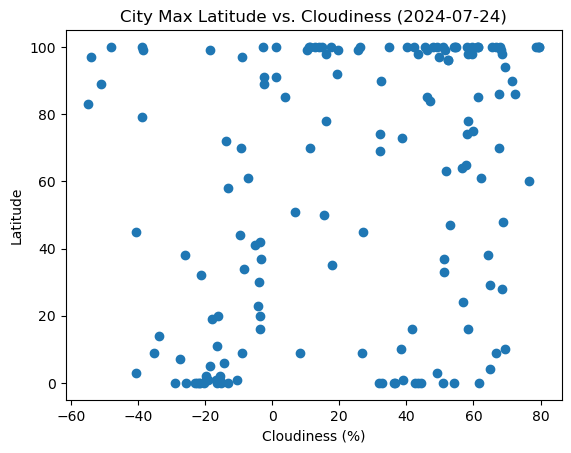

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({formatted_date})")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

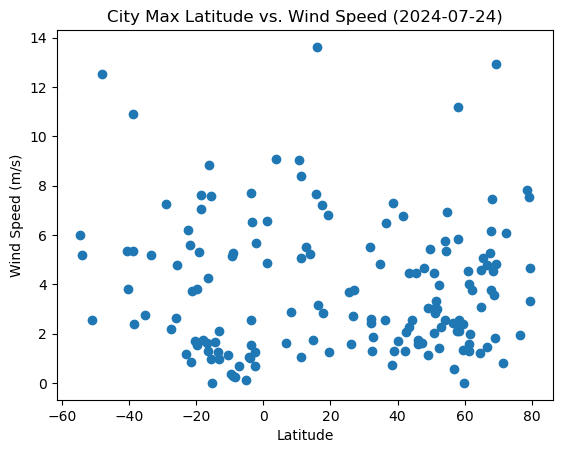

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed ({formatted_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def drawLinearRegressionPlot(x, y):
    # Perform linear regression using linregress
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate the regression line
    regression_line = slope * x + intercept

    # Create scatter plot
    plt.scatter(x, y)

    # Plot the regression line
    plt.plot(x, regression_line, color='red', label='Regression Line')

    # Add titles and labels
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')

    equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(x.min(), y.min(), equation_text, fontsize=12, color='red')

    # Show plot
    plt.show()


In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yanam,16.0208,83.0973,28.79,78,98,13.62,IN,1721864694
1,susuman,66.6658,150.9612,11.00,62,100,1.46,RU,1721864694
2,kiffa,16.1557,-10.6323,28.12,66,78,3.16,MR,1721864695
5,ushuaia,31.7649,19.0126,27.48,81,0,5.51,LY,1721864698
7,edinburgh of the seven seas,39.0932,-26.1714,22.96,78,1,1.30,PT,1721864699


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,manacapuru,-2.3872,-61.0332,28.38,56,89,1.24,BR,1721864695
4,jose bonifacio,-21.1991,-49.8543,22.37,26,32,3.74,BR,1721864696
6,longyearbyen,-54.8082,-69.7466,-0.44,84,83,6.01,AR,1721864699
10,selkirk,-23.0011,43.8674,14.52,73,0,1.18,MG,1721864702
11,jamestown,-9.6028,-66.7577,26.45,43,44,0.37,BR,1721864703


###  Temperature vs. Latitude Linear Regression Plot

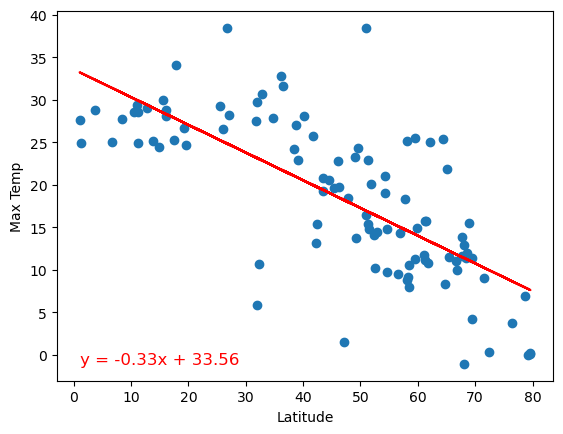

In [37]:
# Linear regression on Northern Hemisphere
drawLinearRegressionPlot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

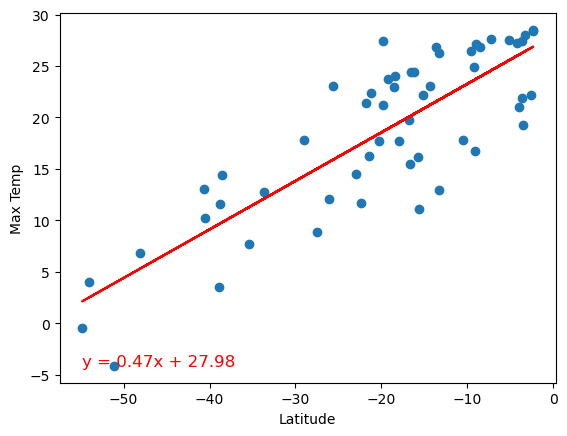

In [38]:
# Linear regression on Southern Hemisphere
drawLinearRegressionPlot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

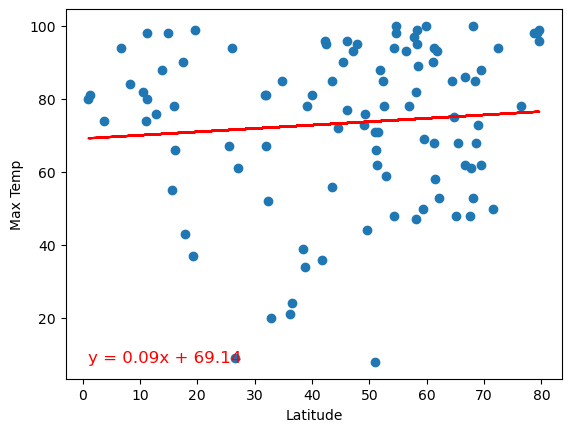

In [39]:
# Northern Hemisphere
drawLinearRegressionPlot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

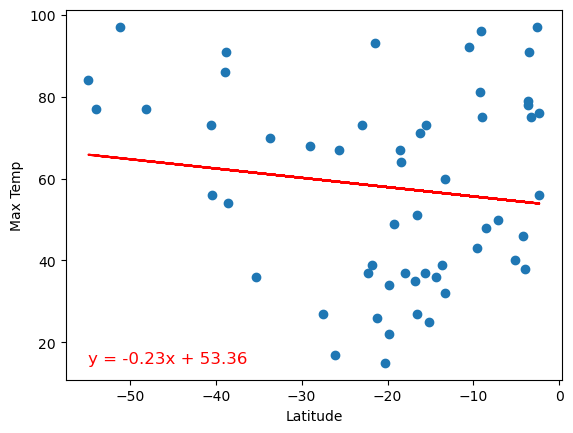

In [40]:
# Southern Hemisphere
drawLinearRegressionPlot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

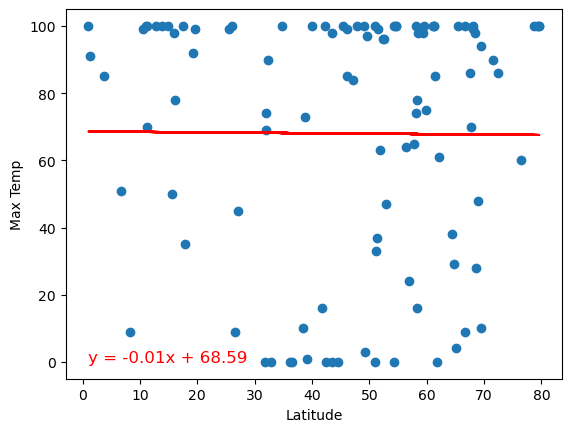

In [41]:
# Northern Hemisphere
drawLinearRegressionPlot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

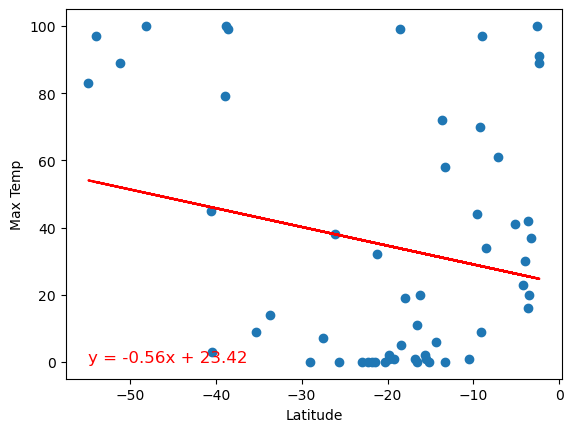

In [42]:
# Southern Hemisphere
drawLinearRegressionPlot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

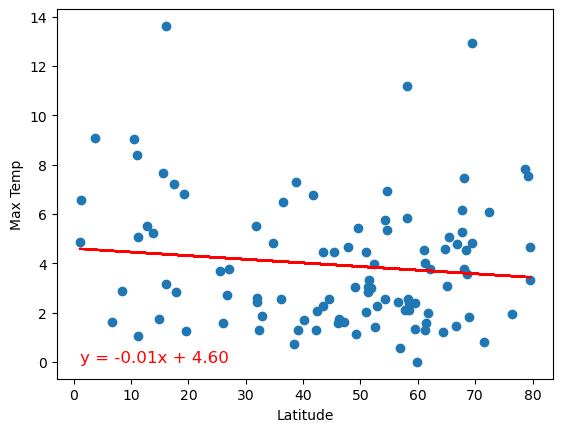

In [43]:
# Northern Hemisphere
drawLinearRegressionPlot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

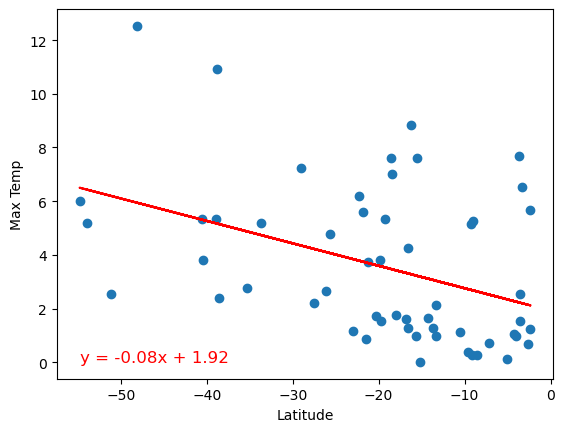

In [44]:
# Southern Hemisphere
drawLinearRegressionPlot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE